# TOPIC LOAN APROVAL MODEL
# DEGREE AWARD PROJECT





In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [126]:
df = pd.read_csv('train.csv')
# converting loan status to numericals because it is the taget column
df.Loan_Status=df.Loan_Status.map({"Y":1,'N':0})

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [129]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


# preprocessing on data

In [130]:
Loan_Status=df.Loan_Status
test= pd.read_csv('test.csv')
Loan_ID=test.Loan_ID
data=pd.concat([df, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [131]:
# CHECKING THE DATA TYPE IN THE COLUMNS
#find the datatypes in the dataset
#object - categorical variables
#int64 - integers
#float - decimal variables
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [132]:
data.shape

(981, 13)

In [133]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,981.000000,981.000000,954.000000,961.000000,902.000000,614.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,0.687296
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.463973
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


# data visualization

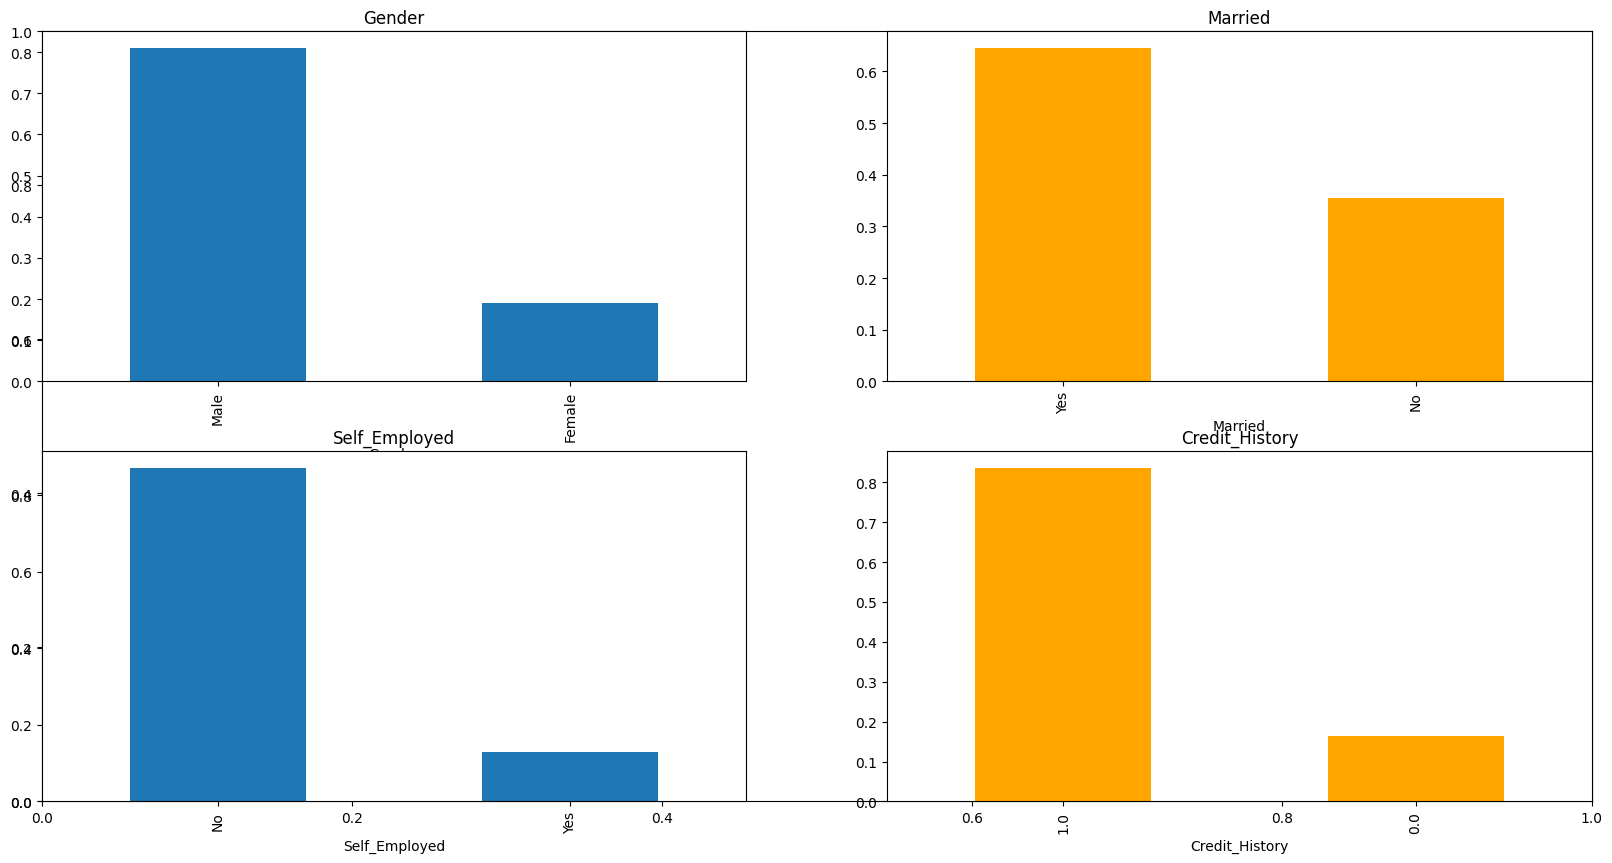

In [134]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

#categorical and ordinal features visualization
#independent variables -  categorical
fig, axs = plt.subplots()
plt.subplot(221)

data['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Gender')

plt.subplot(222)

data['Married'].value_counts(normalize = True).plot.bar(title = 'Married', color = 'orange')

plt.subplot(223)

data['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')

plt.subplot(224)

data['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History',color = 'orange')
plt.show()

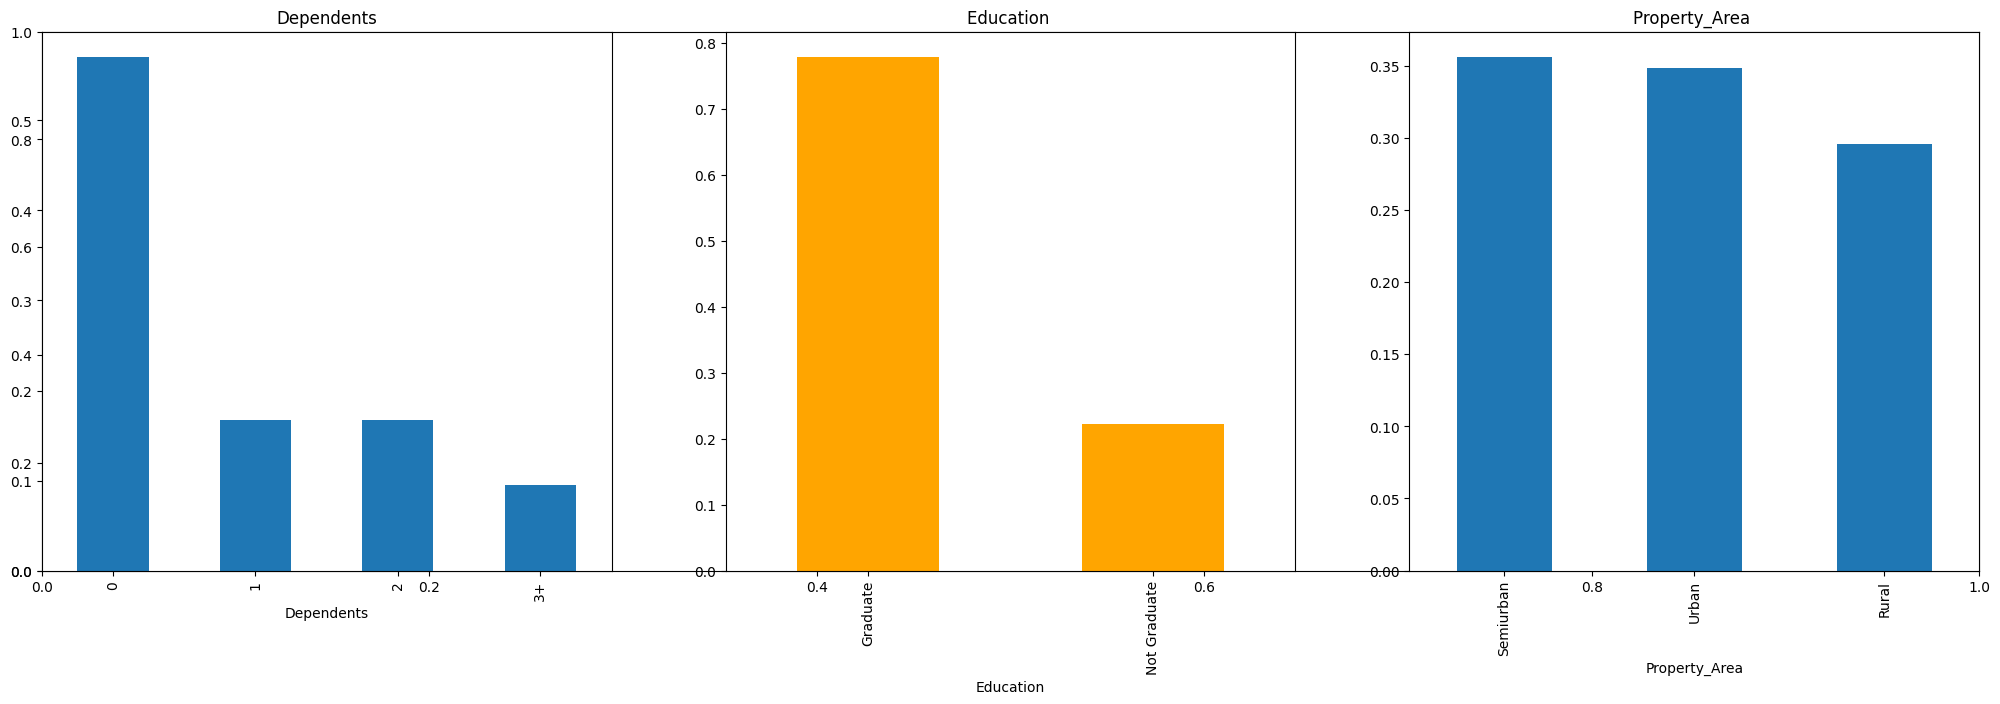

In [135]:
#ordinal independent variables
fig, axs = plt.subplots()
plt.subplot(131)

data['Dependents'].value_counts(normalize = True).plot.bar(figsize = (25,7),title = 'Dependents')

plt.subplot(132)

data['Education'].value_counts(normalize = True).plot.bar(title = 'Education ', color = 'orange')

plt.subplot(133)

data['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area ')

plt.show()

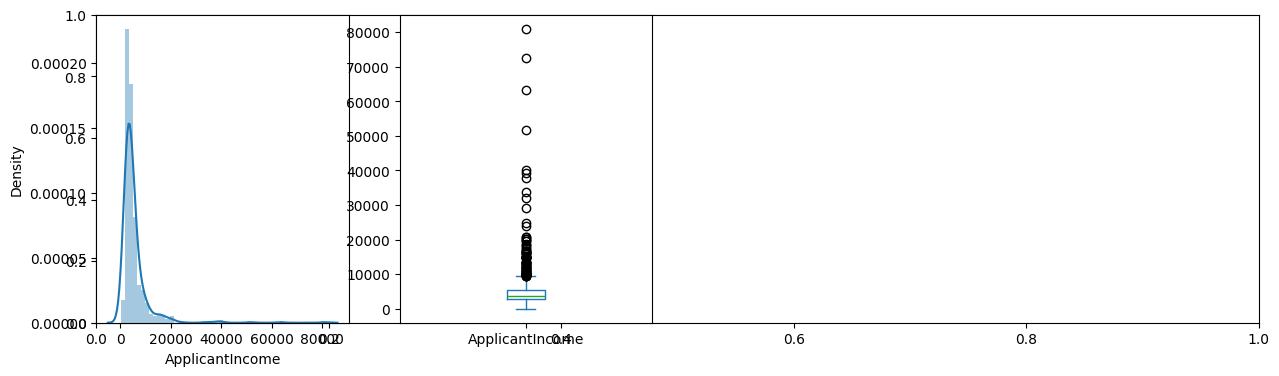

In [136]:
#independent variables - numerical
fig, axs = plt.subplots()
plt.subplot(141)
sns.distplot(df['ApplicantIncome'])

plt.subplot(142)
data['ApplicantIncome'].plot.box(figsize = (15,4))
plt.show()

Text(0.5, 0.98, '')

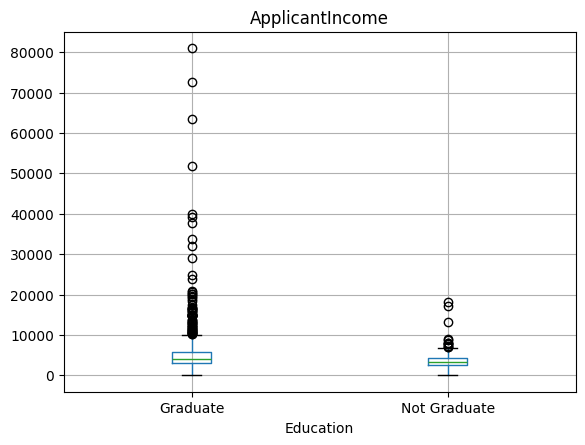

In [137]:
#CHECKING THE OUTLIERS
data.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")

#there are graduates with very high incomes which are seen as outliers

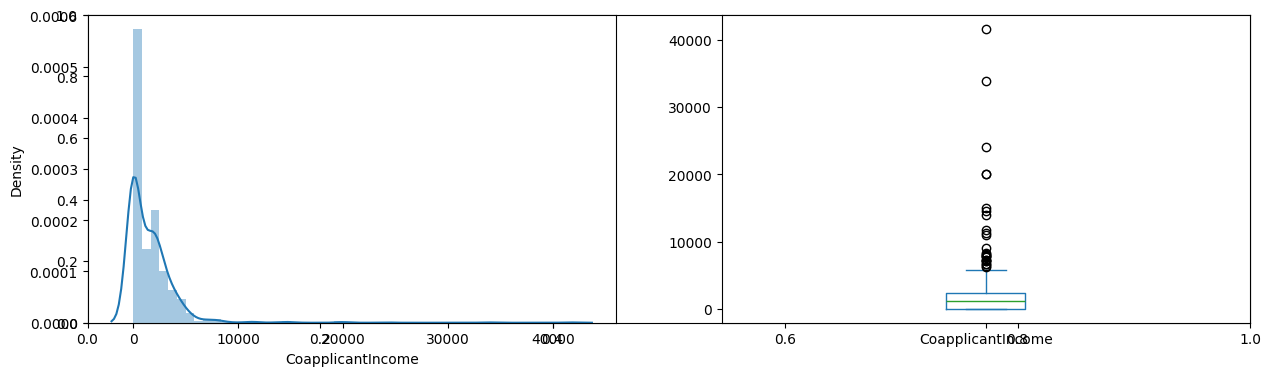

In [138]:
fig, axs = plt.subplots()
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize = (15,4))
plt.show()

#coapplicant income is not normally distributed, there are alot of outliers
#outlier treatment will be done later.

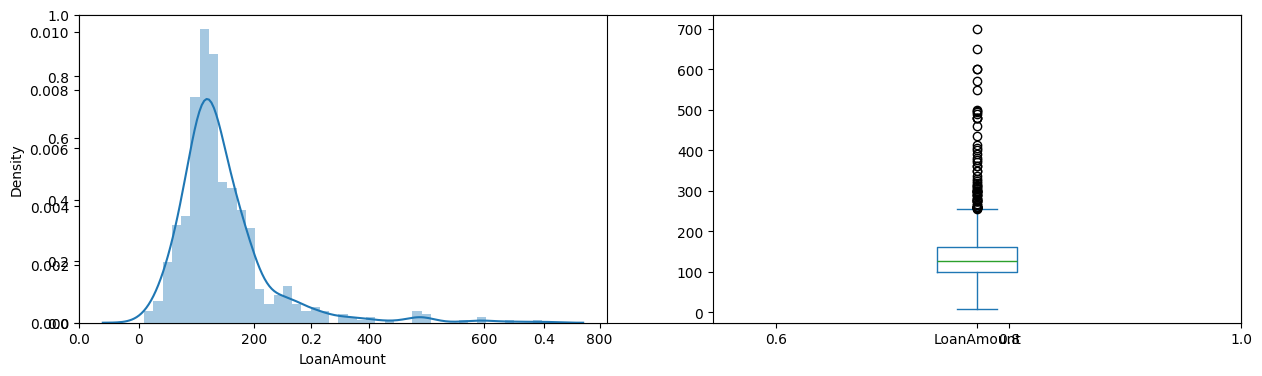

In [139]:
#distribution of loan amount
fig, axs = plt.subplots()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
data['LoanAmount'].plot.box(figsize = (15,4))
plt.show()

Let's generate some hypothesis.

- low income earners are likely to default the loan in comaparison to higher.

- Credit history plays a part in the likeability of the applicant to default the loan and aproval.
- Applicants with high loan amount term are more likely to default the loan.
- Education level of applicant's influences the likeability to default loan while aproved.
- The higher the amount to be paid every month, the higher the possibilty of defaulting for an individual.
- If the applicant's loan has been approved they are less likely to default because the model checks on most frames of his or  her credibility.
- We will test the hypotheses using bivariate analysis whereby we explore the variables with respect to the target variables.

<Axes: xlabel='Gender'>

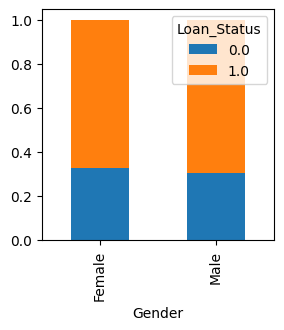

In [140]:
#proportion that shows us paid and defaulted loans
#Gender vs loan status
Gender_status = pd.crosstab(data['Gender'], data['Loan_Status'])
Gender_status.div(Gender_status.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (3,3))

According to the bar graph females were likely to default the loan while approved compared to men so men are more likely to get aprrovede for the loan

In [141]:
data.Dependents.dtypes

dtype('O')

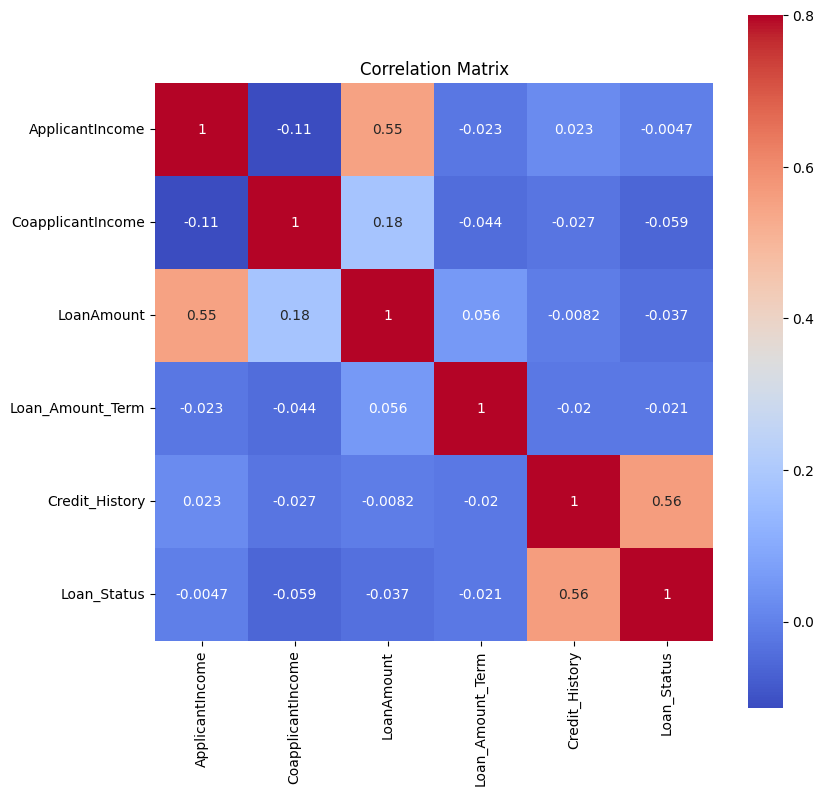

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

# Drop 'Loan_ID' and keep only numeric columns
numeric_data = data.drop('Loan_ID', axis=1).select_dtypes(include=['number'])

# Calculate correlation
corrmat = numeric_data.corr()

# Plot
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [143]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


<Axes: xlabel='Gender'>

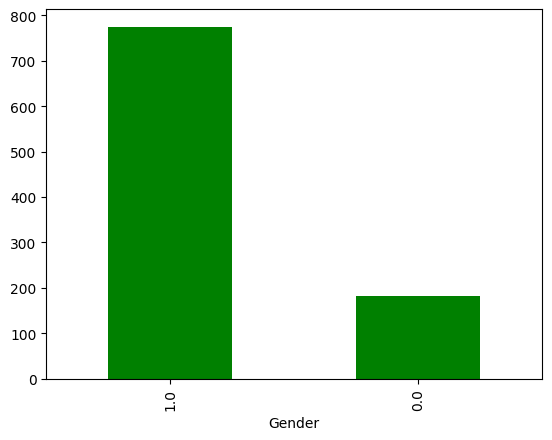

In [144]:
data['Gender'].value_counts().plot.bar(color = "green")

<Axes: >

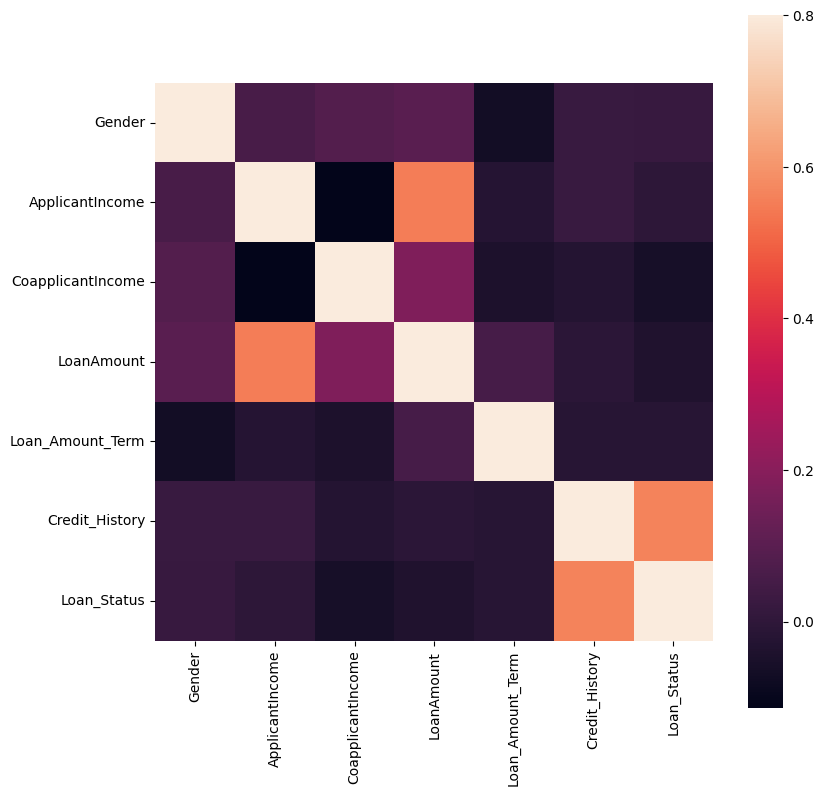

In [145]:
## Let's see correlations
corrmat = data.select_dtypes(include=['number']).corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [146]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

<Axes: xlabel='Married'>

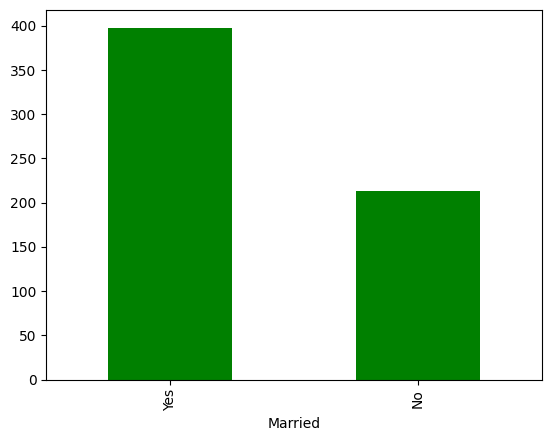

In [147]:
df['Married'].value_counts().plot.bar(color = "green")

In [148]:
data.Married.value_counts()

,count
Married,
1.0,631
0.0,347


In [149]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

<Axes: xlabel='Dependents'>

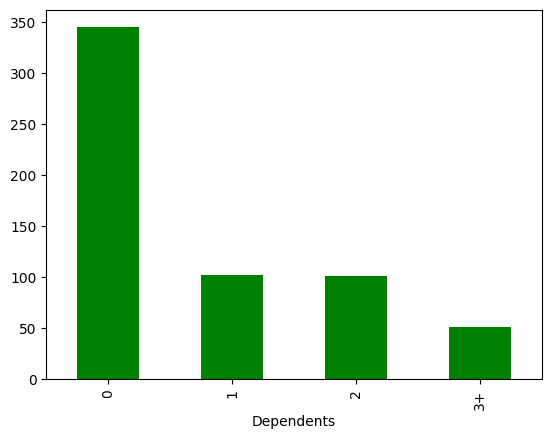

In [150]:
df['Dependents'].value_counts().plot.bar(color = "green")

In [151]:
data.Dependents.value_counts()

,count
Dependents,
0.0,545
1.0,160
2.0,160
3.0,91


<Axes: >

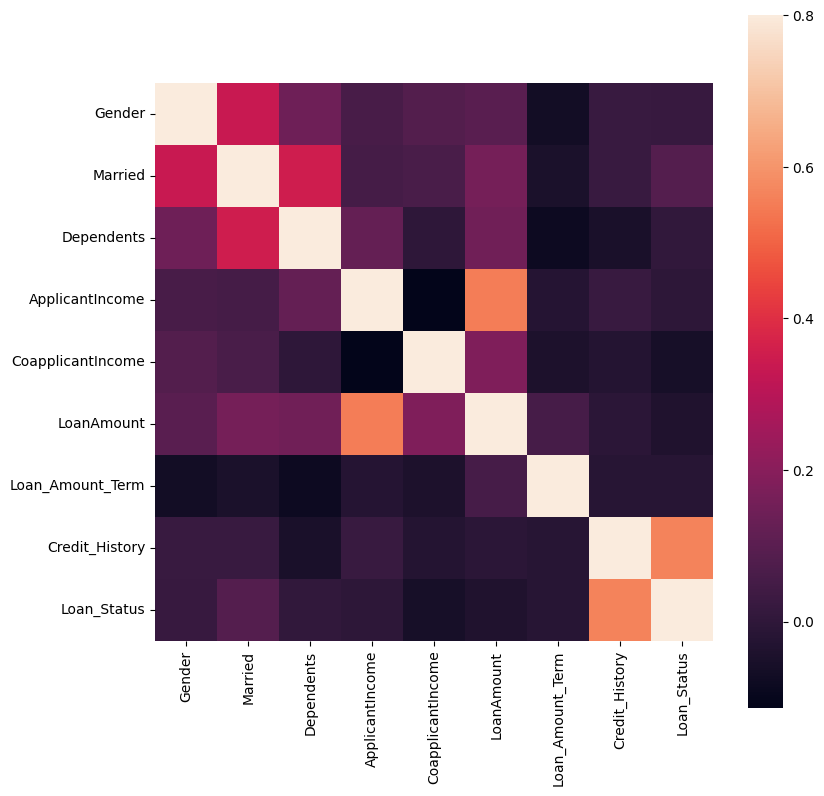

In [152]:
## Let's see correlations for it
corrmat = data.select_dtypes(include=['number']).corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [153]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

<Axes: xlabel='Education'>

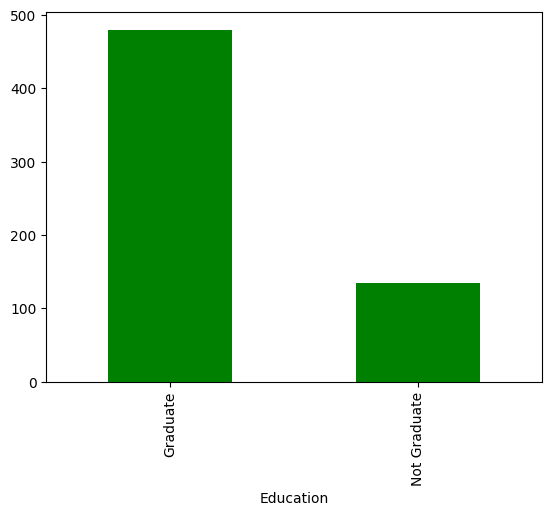

In [154]:
df['Education'].value_counts().plot.bar(color = "green")

In [155]:
data.Education.value_counts()

,count
Education,
1,763
0,218


In [156]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

<Axes: xlabel='Self_Employed'>

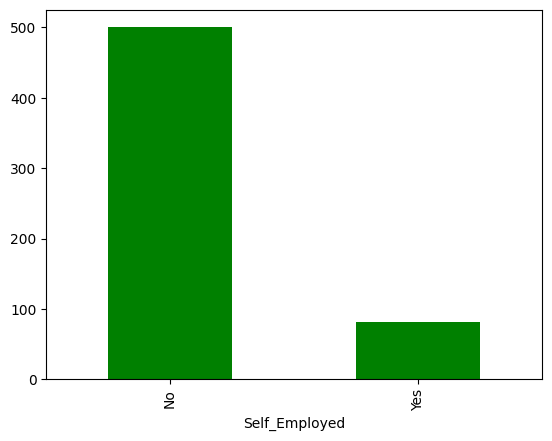

In [157]:
df['Self_Employed'].value_counts().plot.bar(color = "green")

In [158]:
data.Self_Employed.value_counts()

,count
Self_Employed,
0.0,807
1.0,119


In [159]:
data.Property_Area.value_counts()

,count
Property_Area,
Semiurban,349
Urban,342
Rural,290


<Axes: xlabel='Property_Area'>

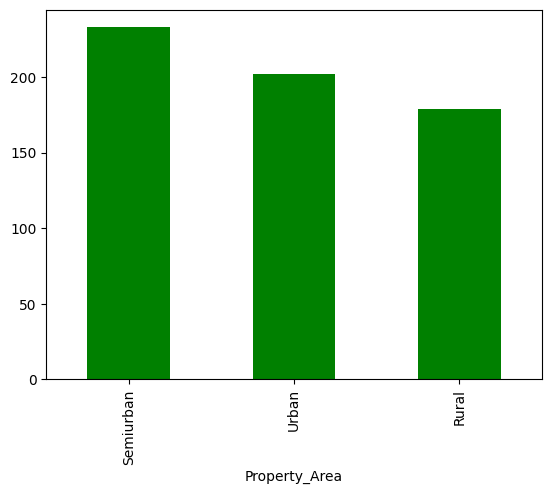

In [160]:
df['Property_Area'].value_counts().plot.bar(color = "green")

In [161]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [162]:
data.Property_Area.value_counts()

,count
Property_Area,
1,349
2,342
0,290


<Axes: >

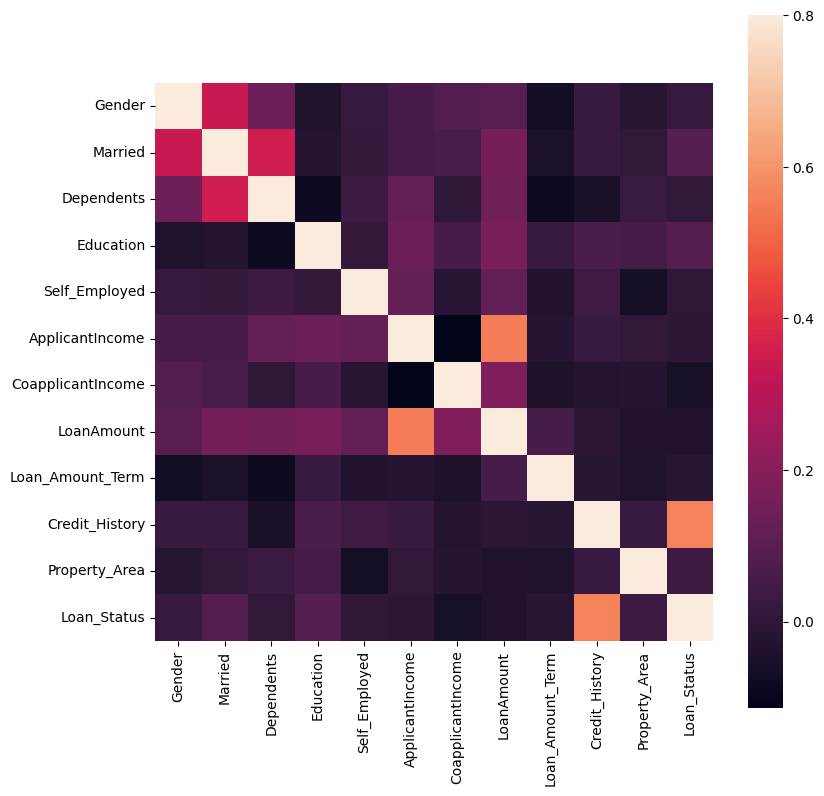

In [163]:
corrmat = data.select_dtypes(include=['number']).corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [164]:
data.head()
# ALL COLUMNS ARE NOW CONVERTED TO NUMERICAL VARIABLES

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1.0


In [165]:
#SIZE OF THE DATA
data.Credit_History.size

981

In [166]:
#label encoding( this is converting categorical variables into numerical format because argorithms requre numerical inputs)
#from sklearn.preprocessing import LabelEncoder
# in our data frame loan prediction model, we extract colums withy categorical variables
#Categorical_columns = ['Gender','','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']
#label_encoder = LabelEncoder()
# we now do the encoding here by
#for col in Categorical_columns:
  #data[col] = label_encoder.fit_transform(data[col])

# missing values


In [167]:
# CHECKING MISSING VALUE
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [168]:
# filling MISSING VALUES IN CREDIT HISTORY
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [169]:

data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [170]:
# filling MISSING VALUES IN married
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [171]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [172]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [173]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [174]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [175]:
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


In [176]:
## Filling Gender with random number between 0-2
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [177]:
data.Gender.value_counts()

,count
Gender,
1.0,799
0.0,182


In [178]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [179]:
# Cheching missing variables in loan status before droping because its the main taget of prediction in training the model to remove any missing values
data['Loan_Status']= df['Loan_Status'].fillna(df['Loan_Status'].mean())

In [180]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [181]:
data.drop('Loan_Status',axis=1,inplace=True)
data.drop('Loan_ID',axis=1,inplace=True)

In [182]:

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


<Axes: >

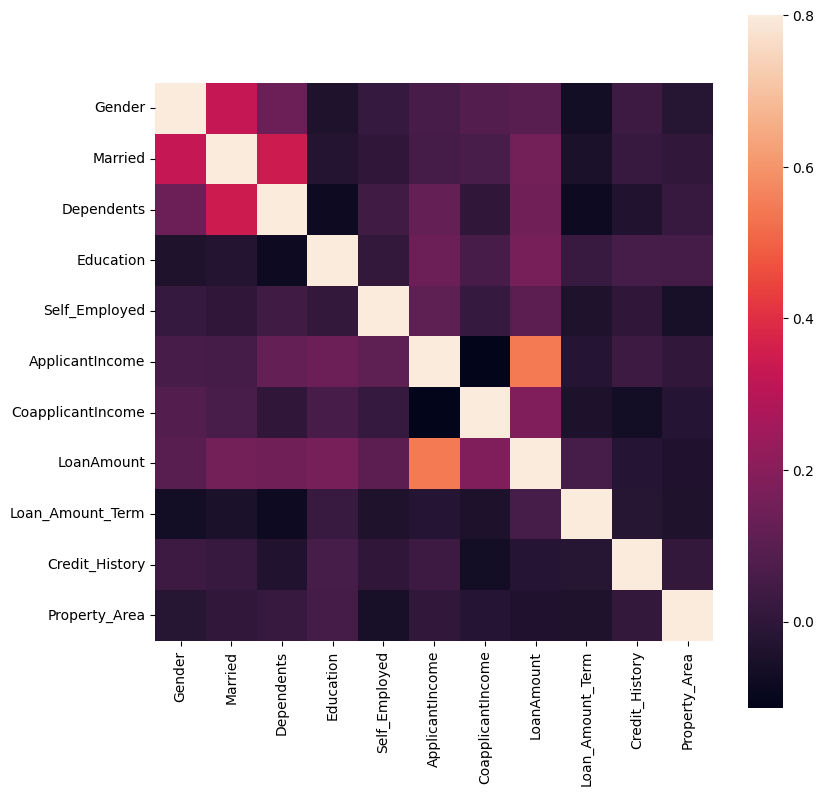

In [183]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [184]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


# Split the Data into X & Y

In [185]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y= Loan_Status  ## Loan status will be our Y

In [186]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [187]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [188]:
# train_X.head()
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


In [189]:
test_y.head()

,Loan_Status
454,1
52,0
536,1
469,0
55,1


#  Machine Learning Models

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [191]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [192]:
scoring='accuracy'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [193]:
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

LogisticRegression()
Logistic Regression 0.752174
DecisionTreeClassifier()
Decision Tree 0.615217
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.763043
RandomForestClassifier()
Random Forest 0.736957
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.647826
GaussianNB()
Naive Bayes 0.745652


In [194]:
LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


Model Accuracy:-  0.8116883116883117
[[ 23  20]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



In [195]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [196]:
X_test=data.iloc[614:,]
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [197]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [198]:
prediction = LR.predict(X_test)

In [199]:
print(prediction)

[1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]


In [200]:

## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

In [201]:
print(t)

[1]


In [214]:
import pickle
import os
# Create the folder if it doesn't exist
os.makedirs('./Model', exist_ok=True)
# now you can save it to a file
file = './Model/loan.pkl'
with open(file, 'wb') as f:
    pickle.dump(LR, f)
    from google.colab import files
files.download('/content/Model/loan.pkl')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
with open(file, 'rb') as f:
    LR = pickle.load(f)

In [211]:
#LR.fit(train_X, train_y)

c = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(c)

[1]
